In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a Convolutional Block (no residuals)
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ConvBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        return out

# Define an Upsampling Block
class UpConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpConv, self).__init__()
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
        
    def forward(self, x1, x2):
        x1 = self.up(x1)
        x = torch.cat([x2, x1], dim=1)
        return x

# Define the UNet Model
class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super(UNet, self).__init__()
        
        # Encoder
        self.enc1 = ConvBlock(in_channels, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = ConvBlock(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = ConvBlock(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = ConvBlock(256, 512)
        self.pool4 = nn.MaxPool2d(2)
        
        # Bridge
        self.bridge = ConvBlock(512, 1024)
        
        # Decoder
        self.dec4 = UpConv(1024, 512)
        self.dec4_conv = ConvBlock(1024, 512)
        self.dec3 = UpConv(512, 256)
        self.dec3_conv = ConvBlock(512, 256)
        self.dec2 = UpConv(256, 128)
        self.dec2_conv = ConvBlock(256, 128)
        self.dec1 = UpConv(128, 64)
        self.dec1_conv = ConvBlock(128, 64)
        
        # Output
        self.final = nn.Sequential(
            nn.Conv2d(64, out_channels, kernel_size=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool1(enc1))
        enc3 = self.enc3(self.pool2(enc2))
        enc4 = self.enc4(self.pool3(enc3))
        
        # Bridge
        bridge = self.bridge(self.pool4(enc4))
        
        # Decoder
        dec4 = self.dec4(bridge, enc4)
        dec4 = self.dec4_conv(dec4)
        dec3 = self.dec3(dec4, enc3)
        dec3 = self.dec3_conv(dec3)
        dec2 = self.dec2(dec3, enc2)
        dec2 = self.dec2_conv(dec2)
        dec1 = self.dec1(dec2, enc1)
        dec1 = self.dec1_conv(dec1)
        
        # Output
        return self.final(dec1)


Using device: cuda
Loading data...


100%|██████████| 110/110 [00:07<00:00, 15.43it/s]


Train: 2751, Validation: 589, Test: 589


Epoch 1/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 1/100 - Train Loss: 0.4964, Train Dice Loss: 0.9742, Val Loss: 0.4722, Val Dice Loss: 0.9651
Saved best model with validation loss: 0.4722


Epoch 2/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.79it/s]


Epoch 2/100 - Train Loss: 0.4546, Train Dice Loss: 0.9649, Val Loss: 0.4434, Val Dice Loss: 0.9647
Saved best model with validation loss: 0.4434


Epoch 3/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.99it/s]


Epoch 3/100 - Train Loss: 0.4354, Train Dice Loss: 0.9543, Val Loss: 0.4252, Val Dice Loss: 0.9529
Saved best model with validation loss: 0.4252


Epoch 4/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.99it/s]


Epoch 4/100 - Train Loss: 0.4193, Train Dice Loss: 0.9397, Val Loss: 0.4147, Val Dice Loss: 0.9272
Saved best model with validation loss: 0.4147


Epoch 5/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.98it/s]


Epoch 5/100 - Train Loss: 0.4005, Train Dice Loss: 0.9133, Val Loss: 0.3935, Val Dice Loss: 0.9179
Saved best model with validation loss: 0.3935


Epoch 6/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.74it/s]


Epoch 6/100 - Train Loss: 0.3823, Train Dice Loss: 0.8834, Val Loss: 0.3679, Val Dice Loss: 0.8650
Saved best model with validation loss: 0.3679


Epoch 7/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.14it/s]


Epoch 7/100 - Train Loss: 0.3568, Train Dice Loss: 0.8343, Val Loss: 0.3456, Val Dice Loss: 0.8201
Saved best model with validation loss: 0.3456


Epoch 8/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 8/100 - Train Loss: 0.3250, Train Dice Loss: 0.7653, Val Loss: 0.3086, Val Dice Loss: 0.7340
Saved best model with validation loss: 0.3086


Epoch 9/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 9/100 - Train Loss: 0.2931, Train Dice Loss: 0.6913, Val Loss: 0.2844, Val Dice Loss: 0.6674
Saved best model with validation loss: 0.2844


Epoch 10/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 10/100 - Train Loss: 0.2540, Train Dice Loss: 0.5980, Val Loss: 0.2388, Val Dice Loss: 0.5672
Saved best model with validation loss: 0.2388


Epoch 11/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.76it/s]


Epoch 11/100 - Train Loss: 0.2232, Train Dice Loss: 0.5222, Val Loss: 0.2159, Val Dice Loss: 0.5020
Saved best model with validation loss: 0.2159


Epoch 12/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.96it/s]


Epoch 12/100 - Train Loss: 0.1913, Train Dice Loss: 0.4446, Val Loss: 0.1809, Val Dice Loss: 0.4240
Saved best model with validation loss: 0.1809


Epoch 13/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.06it/s]


Epoch 13/100 - Train Loss: 0.1748, Train Dice Loss: 0.4036, Val Loss: 0.1972, Val Dice Loss: 0.4582
EarlyStopping counter: 1 out of 10


Epoch 14/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 14/100 - Train Loss: 0.1590, Train Dice Loss: 0.3646, Val Loss: 0.1605, Val Dice Loss: 0.3738
Saved best model with validation loss: 0.1605


Epoch 15/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.10it/s]


Epoch 15/100 - Train Loss: 0.1567, Train Dice Loss: 0.3564, Val Loss: 0.1692, Val Dice Loss: 0.3925
EarlyStopping counter: 1 out of 10


Epoch 16/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 16/100 - Train Loss: 0.1521, Train Dice Loss: 0.3458, Val Loss: 0.2143, Val Dice Loss: 0.4959
EarlyStopping counter: 2 out of 10


Epoch 17/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.09it/s]


Epoch 17/100 - Train Loss: 0.1429, Train Dice Loss: 0.3246, Val Loss: 0.1545, Val Dice Loss: 0.3564
Saved best model with validation loss: 0.1545


Epoch 18/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 18/100 - Train Loss: 0.1351, Train Dice Loss: 0.3052, Val Loss: 0.1360, Val Dice Loss: 0.3143
Saved best model with validation loss: 0.1360


Epoch 19/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.03it/s]


Epoch 19/100 - Train Loss: 0.1352, Train Dice Loss: 0.3055, Val Loss: 0.1391, Val Dice Loss: 0.3209
EarlyStopping counter: 1 out of 10


Epoch 20/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 20/100 - Train Loss: 0.1190, Train Dice Loss: 0.2671, Val Loss: 0.1221, Val Dice Loss: 0.2822
Saved best model with validation loss: 0.1221


Epoch 21/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.06it/s]


Epoch 21/100 - Train Loss: 0.1205, Train Dice Loss: 0.2704, Val Loss: 0.1878, Val Dice Loss: 0.4270
EarlyStopping counter: 1 out of 10


Epoch 22/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 22/100 - Train Loss: 0.1231, Train Dice Loss: 0.2754, Val Loss: 0.1302, Val Dice Loss: 0.3000
EarlyStopping counter: 2 out of 10


Epoch 23/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.08it/s]


Epoch 23/100 - Train Loss: 0.1106, Train Dice Loss: 0.2481, Val Loss: 0.1221, Val Dice Loss: 0.2802
Saved best model with validation loss: 0.1221


Epoch 24/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.00it/s]


Epoch 24/100 - Train Loss: 0.1189, Train Dice Loss: 0.2647, Val Loss: 0.1199, Val Dice Loss: 0.2754
Saved best model with validation loss: 0.1199


Epoch 25/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.07it/s]


Epoch 25/100 - Train Loss: 0.1096, Train Dice Loss: 0.2456, Val Loss: 0.1054, Val Dice Loss: 0.2399
Saved best model with validation loss: 0.1054


Epoch 26/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 26/100 - Train Loss: 0.0991, Train Dice Loss: 0.2212, Val Loss: 0.1135, Val Dice Loss: 0.2585
EarlyStopping counter: 1 out of 10


Epoch 27/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.06it/s]


Epoch 27/100 - Train Loss: 0.1042, Train Dice Loss: 0.2323, Val Loss: 0.1123, Val Dice Loss: 0.2565
EarlyStopping counter: 2 out of 10


Epoch 28/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.03it/s]


Epoch 28/100 - Train Loss: 0.1020, Train Dice Loss: 0.2272, Val Loss: 0.1060, Val Dice Loss: 0.2412
EarlyStopping counter: 3 out of 10


Epoch 29/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.11it/s]


Epoch 29/100 - Train Loss: 0.0949, Train Dice Loss: 0.2118, Val Loss: 0.1200, Val Dice Loss: 0.2735
EarlyStopping counter: 4 out of 10


Epoch 30/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.04it/s]


Epoch 30/100 - Train Loss: 0.1081, Train Dice Loss: 0.2408, Val Loss: 0.0995, Val Dice Loss: 0.2288
Saved best model with validation loss: 0.0995


Epoch 31/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.10it/s]


Epoch 31/100 - Train Loss: 0.1047, Train Dice Loss: 0.2339, Val Loss: 0.1010, Val Dice Loss: 0.2309
EarlyStopping counter: 1 out of 10


Epoch 32/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 32/100 - Train Loss: 0.0972, Train Dice Loss: 0.2161, Val Loss: 0.1142, Val Dice Loss: 0.2619
EarlyStopping counter: 2 out of 10


Epoch 33/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.11it/s]


Epoch 33/100 - Train Loss: 0.1116, Train Dice Loss: 0.2480, Val Loss: 0.1203, Val Dice Loss: 0.2719
EarlyStopping counter: 3 out of 10


Epoch 34/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.07it/s]


Epoch 34/100 - Train Loss: 0.0958, Train Dice Loss: 0.2131, Val Loss: 0.1063, Val Dice Loss: 0.2412
EarlyStopping counter: 4 out of 10


Epoch 35/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.11it/s]


Epoch 35/100 - Train Loss: 0.1012, Train Dice Loss: 0.2252, Val Loss: 0.0957, Val Dice Loss: 0.2184
Saved best model with validation loss: 0.0957


Epoch 36/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 36/100 - Train Loss: 0.0914, Train Dice Loss: 0.2034, Val Loss: 0.1062, Val Dice Loss: 0.2425
EarlyStopping counter: 1 out of 10


Epoch 37/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 37/100 - Train Loss: 0.0902, Train Dice Loss: 0.2008, Val Loss: 0.1067, Val Dice Loss: 0.2423
EarlyStopping counter: 2 out of 10


Epoch 38/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 38/100 - Train Loss: 0.0880, Train Dice Loss: 0.1965, Val Loss: 0.1021, Val Dice Loss: 0.2337
EarlyStopping counter: 3 out of 10


Epoch 39/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.10it/s]


Epoch 39/100 - Train Loss: 0.0808, Train Dice Loss: 0.1791, Val Loss: 0.1170, Val Dice Loss: 0.2677
EarlyStopping counter: 4 out of 10


Epoch 40/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.96it/s]


Epoch 40/100 - Train Loss: 0.1007, Train Dice Loss: 0.2257, Val Loss: 0.1299, Val Dice Loss: 0.2979
EarlyStopping counter: 5 out of 10


Epoch 41/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.00it/s]


Epoch 41/100 - Train Loss: 0.0878, Train Dice Loss: 0.1957, Val Loss: 0.0923, Val Dice Loss: 0.2126
Saved best model with validation loss: 0.0923


Epoch 42/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 42/100 - Train Loss: 0.0896, Train Dice Loss: 0.1996, Val Loss: 0.1034, Val Dice Loss: 0.2376
EarlyStopping counter: 1 out of 10


Epoch 43/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 43/100 - Train Loss: 0.0865, Train Dice Loss: 0.1926, Val Loss: 0.1005, Val Dice Loss: 0.2308
EarlyStopping counter: 2 out of 10


Epoch 44/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 44/100 - Train Loss: 0.0877, Train Dice Loss: 0.1948, Val Loss: 0.0989, Val Dice Loss: 0.2275
EarlyStopping counter: 3 out of 10


Epoch 45/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.09it/s]


Epoch 45/100 - Train Loss: 0.0794, Train Dice Loss: 0.1770, Val Loss: 0.1081, Val Dice Loss: 0.2471
EarlyStopping counter: 4 out of 10


Epoch 46/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.03it/s]


Epoch 46/100 - Train Loss: 0.0745, Train Dice Loss: 0.1651, Val Loss: 0.0959, Val Dice Loss: 0.2209
EarlyStopping counter: 5 out of 10


Epoch 47/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.96it/s]


Epoch 47/100 - Train Loss: 0.0797, Train Dice Loss: 0.1781, Val Loss: 0.0926, Val Dice Loss: 0.2131
EarlyStopping counter: 6 out of 10


Epoch 48/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.00it/s]


Epoch 48/100 - Train Loss: 0.0817, Train Dice Loss: 0.1823, Val Loss: 0.0906, Val Dice Loss: 0.2070
Saved best model with validation loss: 0.0906


Epoch 49/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.95it/s]


Epoch 49/100 - Train Loss: 0.0767, Train Dice Loss: 0.1708, Val Loss: 0.0908, Val Dice Loss: 0.2098
EarlyStopping counter: 1 out of 10


Epoch 50/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.08it/s]


Epoch 50/100 - Train Loss: 0.0750, Train Dice Loss: 0.1675, Val Loss: 0.1006, Val Dice Loss: 0.2281
EarlyStopping counter: 2 out of 10


Epoch 51/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.06it/s]


Epoch 51/100 - Train Loss: 0.0842, Train Dice Loss: 0.1881, Val Loss: 0.0857, Val Dice Loss: 0.1987
Saved best model with validation loss: 0.0857


Epoch 52/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.99it/s]


Epoch 52/100 - Train Loss: 0.0840, Train Dice Loss: 0.1856, Val Loss: 0.1094, Val Dice Loss: 0.2466
EarlyStopping counter: 1 out of 10


Epoch 53/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 53/100 - Train Loss: 0.0940, Train Dice Loss: 0.2091, Val Loss: 0.1235, Val Dice Loss: 0.2799
EarlyStopping counter: 2 out of 10


Epoch 54/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.00it/s]


Epoch 54/100 - Train Loss: 0.0752, Train Dice Loss: 0.1668, Val Loss: 0.0942, Val Dice Loss: 0.2143
EarlyStopping counter: 3 out of 10


Epoch 55/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.04it/s]


Epoch 55/100 - Train Loss: 0.0734, Train Dice Loss: 0.1631, Val Loss: 0.0831, Val Dice Loss: 0.1891
Saved best model with validation loss: 0.0831


Epoch 56/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.08it/s]


Epoch 56/100 - Train Loss: 0.0761, Train Dice Loss: 0.1686, Val Loss: 0.0968, Val Dice Loss: 0.2217
EarlyStopping counter: 1 out of 10


Epoch 57/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 57/100 - Train Loss: 0.0792, Train Dice Loss: 0.1768, Val Loss: 0.0913, Val Dice Loss: 0.2087
EarlyStopping counter: 2 out of 10


Epoch 58/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.06it/s]


Epoch 58/100 - Train Loss: 0.0752, Train Dice Loss: 0.1674, Val Loss: 0.0902, Val Dice Loss: 0.2076
EarlyStopping counter: 3 out of 10


Epoch 59/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 59/100 - Train Loss: 0.0954, Train Dice Loss: 0.2133, Val Loss: 0.0945, Val Dice Loss: 0.2162
EarlyStopping counter: 4 out of 10


Epoch 60/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.04it/s]


Epoch 60/100 - Train Loss: 0.0791, Train Dice Loss: 0.1761, Val Loss: 0.0862, Val Dice Loss: 0.1976
EarlyStopping counter: 5 out of 10


Epoch 61/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.04it/s]


Epoch 61/100 - Train Loss: 0.0786, Train Dice Loss: 0.1756, Val Loss: 0.1046, Val Dice Loss: 0.2400
EarlyStopping counter: 6 out of 10


Epoch 62/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.09it/s]


Epoch 62/100 - Train Loss: 0.0806, Train Dice Loss: 0.1797, Val Loss: 0.0906, Val Dice Loss: 0.2009
EarlyStopping counter: 7 out of 10


Epoch 63/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.96it/s]


Epoch 63/100 - Train Loss: 0.0782, Train Dice Loss: 0.1734, Val Loss: 0.0807, Val Dice Loss: 0.1842
Saved best model with validation loss: 0.0807


Epoch 64/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 64/100 - Train Loss: 0.0802, Train Dice Loss: 0.1793, Val Loss: 0.0958, Val Dice Loss: 0.2156
EarlyStopping counter: 1 out of 10


Epoch 65/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.00it/s]


Epoch 65/100 - Train Loss: 0.0734, Train Dice Loss: 0.1644, Val Loss: 0.0832, Val Dice Loss: 0.1917
EarlyStopping counter: 2 out of 10


Epoch 66/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.02it/s]


Epoch 66/100 - Train Loss: 0.0714, Train Dice Loss: 0.1592, Val Loss: 0.0985, Val Dice Loss: 0.2224
EarlyStopping counter: 3 out of 10


Epoch 67/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.04it/s]


Epoch 67/100 - Train Loss: 0.0680, Train Dice Loss: 0.1508, Val Loss: 0.0846, Val Dice Loss: 0.1938
EarlyStopping counter: 4 out of 10


Epoch 68/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.96it/s]


Epoch 68/100 - Train Loss: 0.0743, Train Dice Loss: 0.1654, Val Loss: 0.0858, Val Dice Loss: 0.1959
EarlyStopping counter: 5 out of 10


Epoch 69/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 18.89it/s]


Epoch 69/100 - Train Loss: 0.0714, Train Dice Loss: 0.1587, Val Loss: 0.0937, Val Dice Loss: 0.2155
EarlyStopping counter: 6 out of 10


Epoch 70/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 70/100 - Train Loss: 0.0761, Train Dice Loss: 0.1705, Val Loss: 0.0870, Val Dice Loss: 0.1995
EarlyStopping counter: 7 out of 10


Epoch 71/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.03it/s]


Epoch 71/100 - Train Loss: 0.0817, Train Dice Loss: 0.1826, Val Loss: 0.0881, Val Dice Loss: 0.2027
EarlyStopping counter: 8 out of 10


Epoch 72/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.05it/s]


Epoch 72/100 - Train Loss: 0.0744, Train Dice Loss: 0.1661, Val Loss: 0.1077, Val Dice Loss: 0.2467
EarlyStopping counter: 9 out of 10


Epoch 73/100 (Validation): 100%|██████████| 74/74 [00:03<00:00, 19.01it/s]


Epoch 73/100 - Train Loss: 0.0808, Train Dice Loss: 0.1803, Val Loss: 0.0875, Val Dice Loss: 0.1997
EarlyStopping counter: 10 out of 10
Early stopping triggered


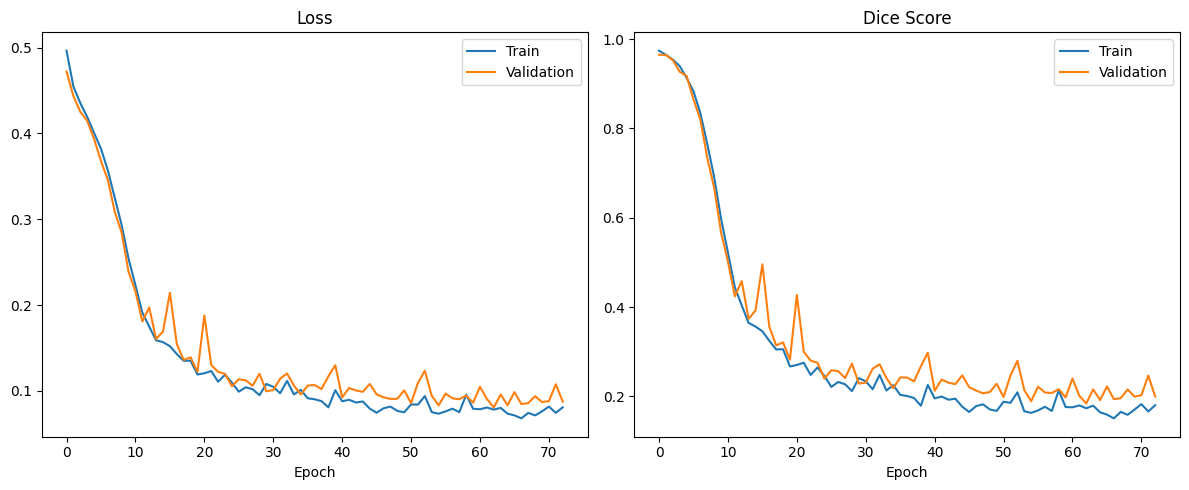

Evaluating: 100%|██████████| 589/589 [00:03<00:00, 162.73it/s]


Test Dice Score: 0.8848


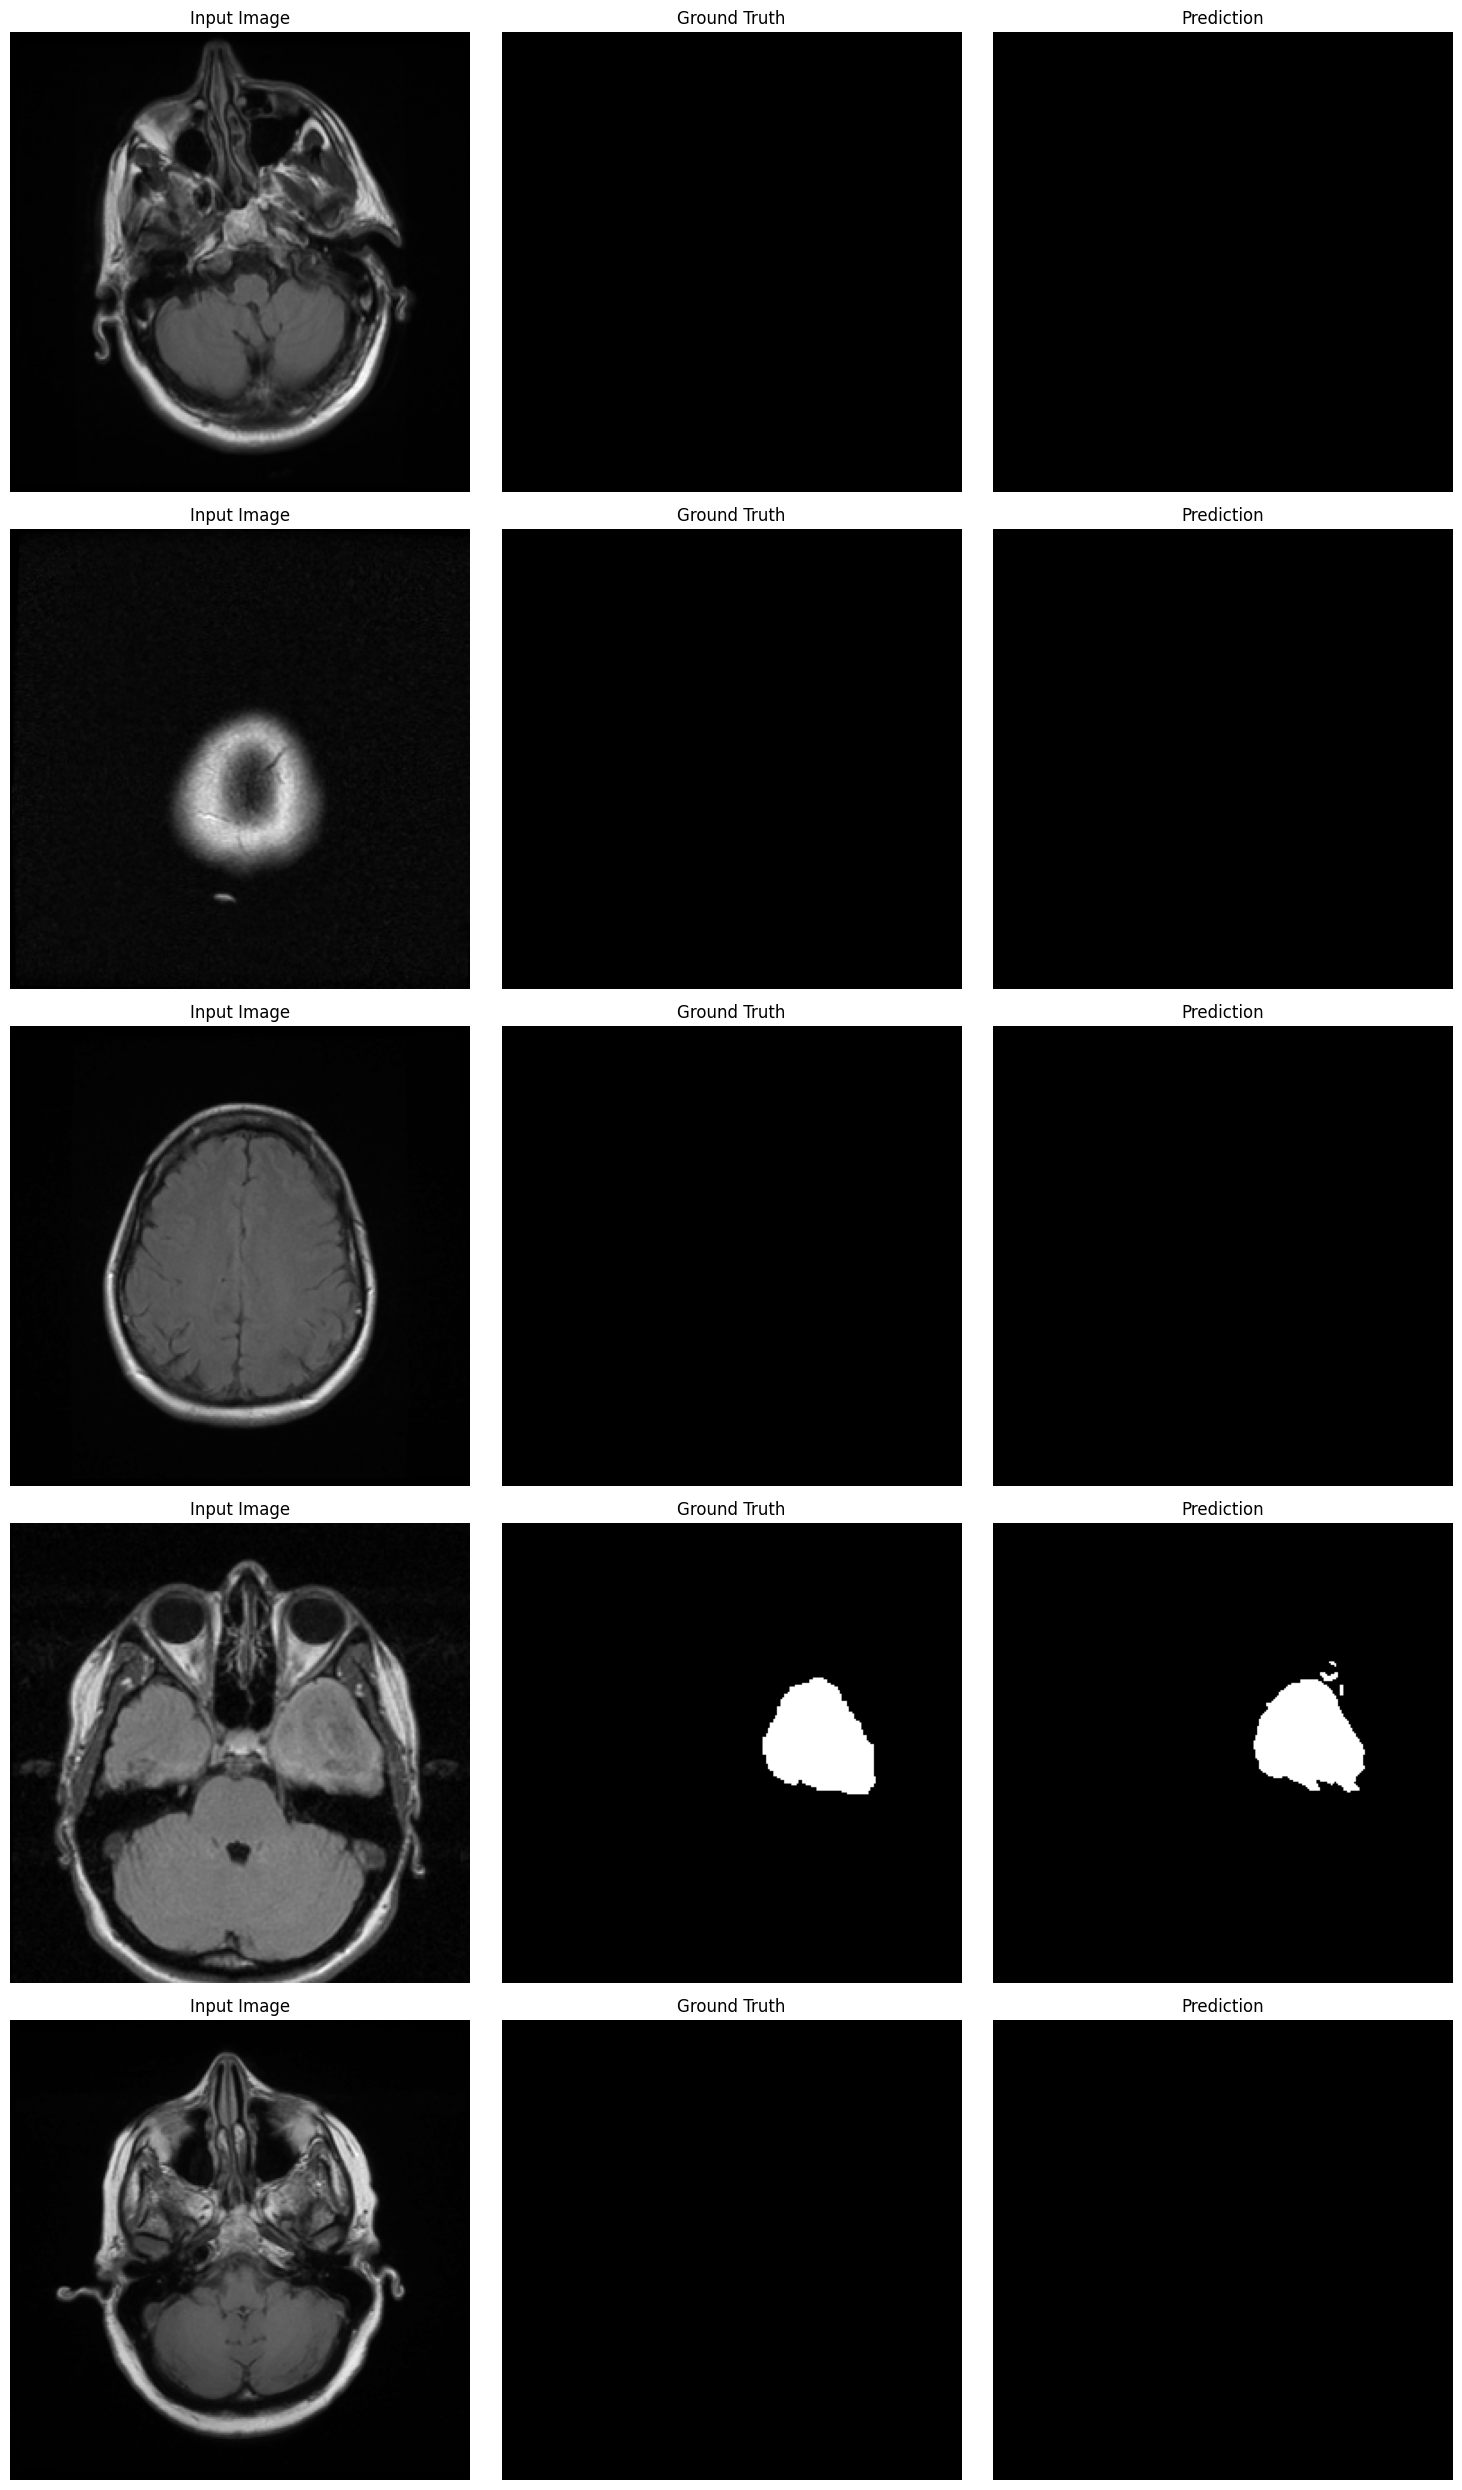

In [2]:
from segmentation import run_segmentation_pipeline

# Create your model instance
my_model = UNet(in_channels=1, out_channels=1)

# Run the pipeline with custom model and naming
trained_model, dice_score = run_segmentation_pipeline(
    model=my_model,
    base_dir="kaggle_3m",
    model_name="Base_Unet",
    batch_size=8,
    patience=10,
    epochs=100
)